# Titanic - Machine Learning from Disaster
## 1- importing dataset:

In [1]:
# download the dataset from kaggle:
#!kaggle competitions download -c titanic

In [2]:
# unzip the dataset:
# ! unzip titanic.zip # this works for linux only
#!powershell -Command "Expand-Archive -Path 'titanic.zip'" # this works for windows only 


In [3]:
#importing the dataset:
import pandas as pd
df = pd.read_csv('titanic/train.csv')
print(df.head())
# splitting the dataset into training and testing:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# checking the shape of the dataset:
print(train_df.shape)
print(test_df.shape)    



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(7

In [4]:
def preprocess_df(df):
    # dropping the columns that are not needed:
    # Extract titles from Name and convert to numbers based on social status
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    title_mapping = {
        # Nobility titles
        'Lady': 8,
        'Countess': 8,
        'Sir': 8,
        'Don': 8, 
        'Dona': 8,
        'Jonkheer': 8,
        
        # Military/Professional titles
        'Capt': 7,
        'Col': 7,
        'Major': 7,
        'Dr': 6,
        'Rev': 6,
        
        # Upper class titles
        'Mrs': 4,
        'Mme': 4,
        'Ms': 4,
        'Miss': 4,
        'Mlle': 4,
        'Mr': 4,
        
        # Youth titles
        'Master': 2,
        
        # Other/Unknown
        'Other': 1
    }
    df['Title'] = df['Title'].map(title_mapping).fillna(1).astype(int)
    # Now drop the original columns
    df = df.drop(['Name', 'Ticket', 'PassengerId','Cabin'], axis=1)
    # replacing the non numeric values with numbers for the sex column:
    df = df.replace({'Sex': {'male': 0, 'female': 1}})
    # filling the missing values in the embarked column then replacing the non numeric values with numbers:
    df['Embarked'] = df['Embarked'].fillna(1)
    df = df.replace({'Embarked': {'S': 1, 'C': 2, 'Q': 3}})
    # filling the missing values in the cabin column then replacing the non numeric values with numbers:
    # df['Cabin'] = df['Cabin'].fillna(0)
    # df['Cabin'] = df['Cabin'].apply(lambda x: ord(str(x)[0]) - ord('A') + 1 if str(x)[0].isalpha() else 0)
    # filling missing values with -1 for age and casting the columns to int:
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Age'] = df['Age'].astype(int)
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Fare'] = df['Fare'].astype(int)
    # Convert remaining numeric columns to int
    df['Pclass'] = df['Pclass'].astype(int)
    df['SibSp'] = df['SibSp'].astype(int)
    df['Parch'] = df['Parch'].astype(int)
    return df

train_df = preprocess_df(train_df)
test_df = preprocess_df(test_df)



print(train_df.head())
print(test_df.head())


     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
331         0       1    0   45      0      0    28         1      4
733         0       2    0   23      0      0    13         1      4
382         0       3    0   32      0      0     7         1      4
704         0       3    0   26      1      0     7         1      4
813         0       3    1    6      4      2    31         1      4
     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
709         1       3    0   30      1      1    15         2      2
439         0       2    0   31      0      0    10         1      4
840         0       3    0   20      0      0     7         1      4
720         1       2    1    6      0      1    33         1      4
39          1       3    1   14      1      0    11         2      4


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_62564\262524021.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_62564\262524021.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Sex': {'male': 0, 'female': 1}})
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_62564\262524021.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [5]:
# splitting the dataset into features and target:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']
# checking the shape of the features:
print(X_train.shape)
print(X_test.shape)
# checking the shape of the target:
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [6]:
import pandas as pd


# Identify columns with NaN values
nan_columns = train_df.columns[train_df.isna().any()].tolist()


print("Columns with NaN values:", nan_columns)

from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    # Initialize MinMaxScaler with range (-1, 1)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    
    # Fit and transform the data
    scaled_data = scaler.fit_transform(df)
    
    # Convert the scaled data back to a DataFrame
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    # give the more important columns more weight:
    scaled_df['Title'] = scaled_df['Title'] * 2
    # scaled_df['Pclass'] = scaled_df['Pclass'] * 2
    scaled_df['Sex'] = scaled_df['Sex'] * 2
    scaled_df['Age'] = scaled_df['Age'] * 2
    # scaled_df['SibSp'] = scaled_df['SibSp'] * 2
    # scaled_df['Parch'] = scaled_df['Parch'] * 2
    return scaled_df

# Normalize training and test data
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

print("Normalized Training Data:\n", X_train.head())
print("\nNormalized Test Data:\n", X_test.head())






Columns with NaN values: []
Normalized Training Data:
    Pclass  Sex   Age  SibSp     Parch      Fare  Embarked     Title
0    -1.0 -2.0  0.25  -1.00 -1.000000 -0.890625      -1.0 -0.666667
1     0.0 -2.0 -0.85  -1.00 -1.000000 -0.949219      -1.0 -0.666667
2     1.0 -2.0 -0.40  -1.00 -1.000000 -0.972656      -1.0 -0.666667
3     1.0 -2.0 -0.70  -0.75 -1.000000 -0.972656      -1.0 -0.666667
4     1.0  2.0 -1.70   0.00 -0.333333 -0.878906      -1.0 -0.666667

Normalized Test Data:
    Pclass  Sex       Age  SibSp  Parch      Fare  Embarked     Title
0     1.0 -2.0 -0.309859   -0.5   -0.6 -0.885496       0.0 -2.000000
1     0.0 -2.0 -0.253521   -1.0   -1.0 -0.923664      -1.0 -0.666667
2     1.0 -2.0 -0.873239   -1.0   -1.0 -0.946565      -1.0 -0.666667
3     0.0  2.0 -1.661972   -1.0   -0.6 -0.748092      -1.0 -0.666667
4     1.0  2.0 -1.211268   -0.5   -1.0 -0.916031       0.0 -0.666667


## 2- Trying different models:
### A- Logistic Regression:


In [7]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, y_train)
# predicting the target:
y_pred_lr = LR_model.predict(X_test)
# checking the accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_lr))




0.8044692737430168


### B- Decision Trees:


In [8]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
# predicting the target:
y_pred_dt = DT_model.predict(X_test)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_dt))




0.7374301675977654


### C- Random Forest:


In [9]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
# predicting the target:
y_pred_rf = RF_model.predict(X_test)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_rf))





0.770949720670391


### D- Support Vector Machines:




In [10]:
from sklearn.svm import SVC
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
# predicting the target:
y_pred_svm = SVM_model.predict(X_test)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_svm))



0.8100558659217877


### E- K-Nearest Neighbors:


In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
# predicting the target:
y_pred_knn = KNN_model.predict(X_test)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_knn))




0.7821229050279329


### F- Gradient Boosting:


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)
# predicting the target:
y_pred_gb = GB_model.predict(X_test)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_gb))




0.8100558659217877


### G- XGBoost:


In [13]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
# predicting the target:
y_pred_xgb = XGB_model.predict(X_test)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_xgb))




0.7653631284916201


### H- 3-layer Neural Network:


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split training data into train and validation sets
X_train_nn, X_val, y_train_nn, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

NN_model = Sequential()
NN_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.fit(X_train_nn, y_train_nn, 
             validation_data=(X_val, y_val),
             epochs=500, 
             batch_size=200,
             callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=100,
                 restore_best_weights=True
             )])



Epoch 1/500


c:\Users\Ghaith\Desktop\ML\projects\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6231 - loss: 0.6535 - val_accuracy: 0.6154 - val_loss: 0.6292
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6367 - loss: 0.6155 - val_accuracy: 0.6154 - val_loss: 0.6028
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6426 - loss: 0.5914 - val_accuracy: 0.6713 - val_loss: 0.5805
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6770 - loss: 0.5840 - val_accuracy: 0.7483 - val_loss: 0.5622
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7510 - loss: 0.5598 - val_accuracy: 0.7762 - val_loss: 0.5463
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7845 - loss: 0.5360 - val_accuracy: 0.7972 - val_loss: 0.5312
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7936 - loss: 0.5359 - val_accuracy: 0.8252 - val_loss: 0.5161
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7790 - loss: 0.5265 - val_accuracy: 0.8322 - val_loss: 0.5028
Epo

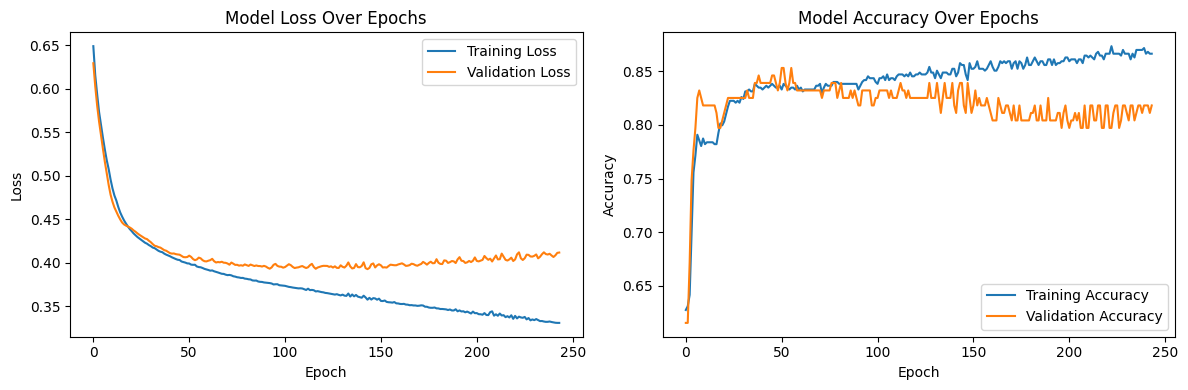

In [15]:
# Plot training history
import matplotlib.pyplot as plt

# Get training history
history = NN_model.history.history

# Plot loss over epochs
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy over epochs
plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# predicting the target:
y_pred_nn = (NN_model.predict(X_test) > 0.5).astype(int)
# checking the accuracy:
print(accuracy_score(y_test, y_pred_nn))




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.7932960893854749


## 3- Comparing the models:


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.804469   0.782609  0.729730  0.755245
1        Random Forest  0.770950   0.823529  0.567568  0.672000
2       Neural Network  0.793296   0.784615  0.689189  0.733813
3        Decision Tree  0.737430   0.736842  0.567568  0.641221
4                  SVM  0.810056   0.833333  0.675676  0.746269
5                  KNN  0.782123   0.761194  0.689189  0.723404
6    Gradient Boosting  0.810056   0.857143  0.648649  0.738462
7              XGBoost  0.765363   0.735294  0.675676  0.704225

Detailed Classification Reports:
--------------------------------------------------

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg   

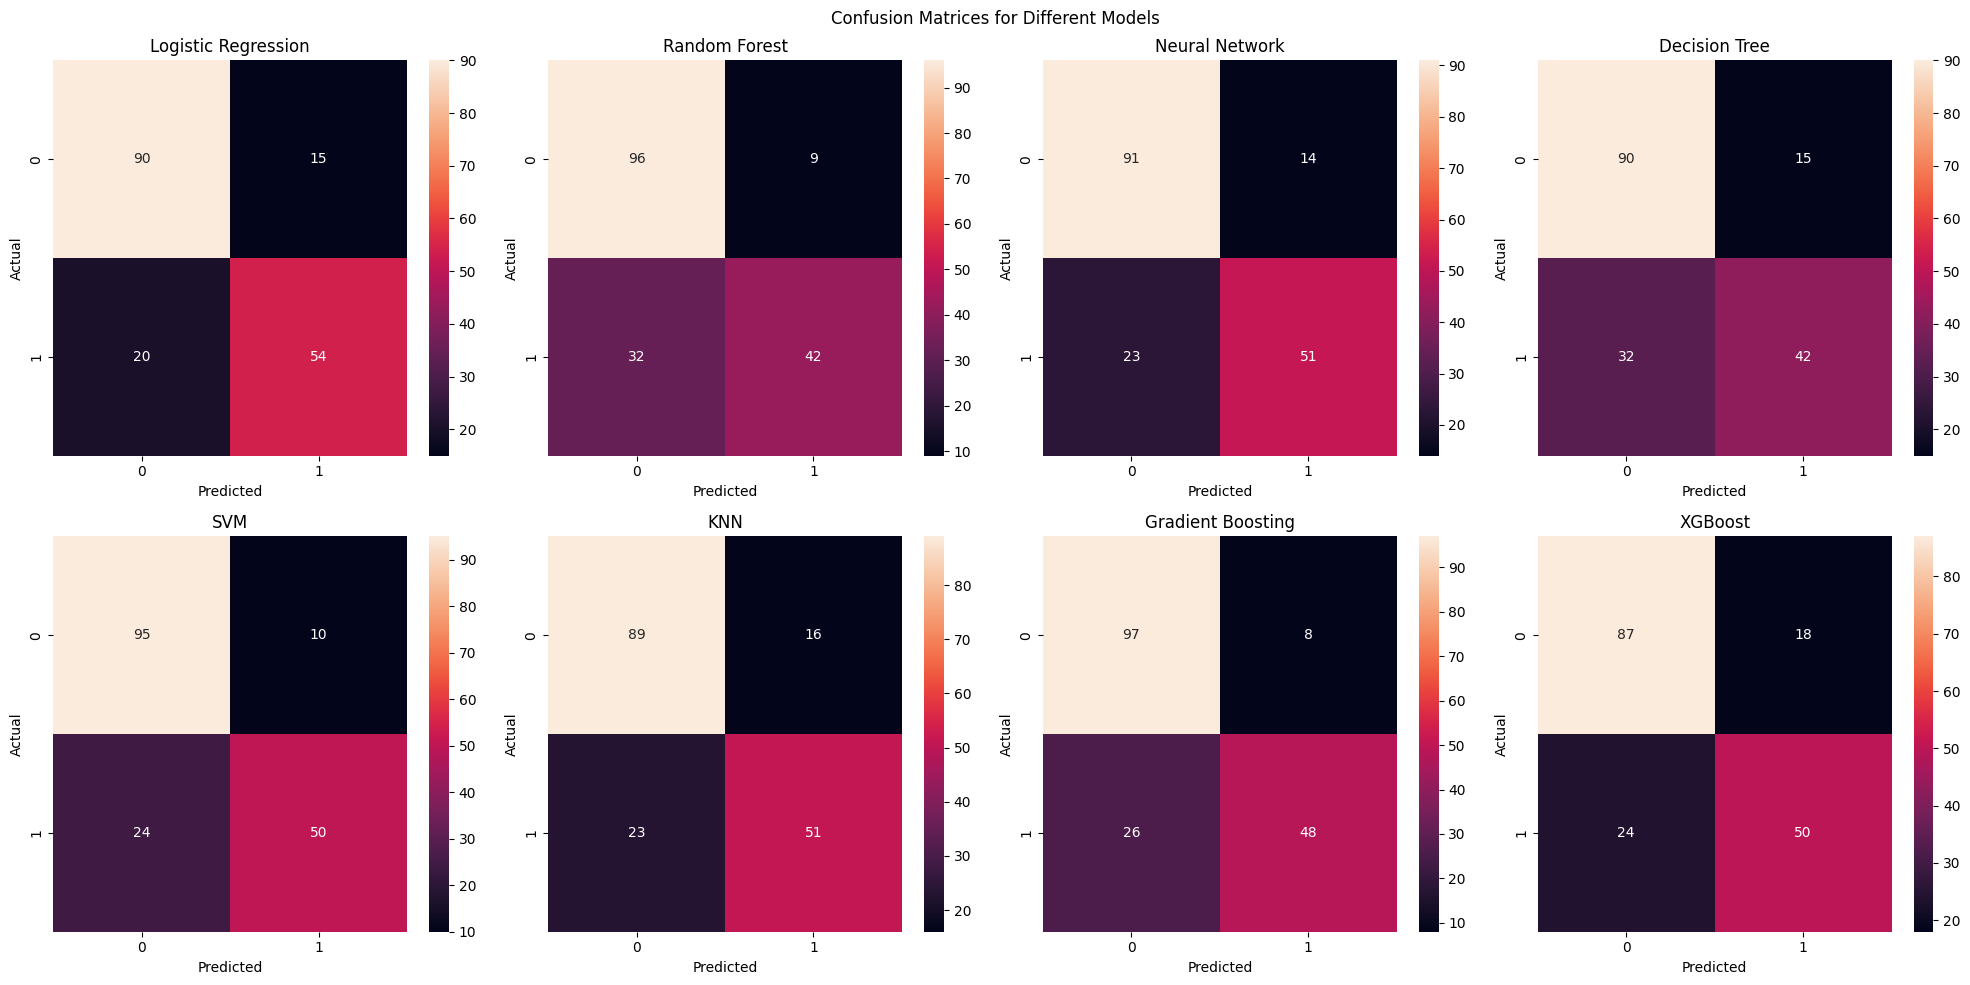

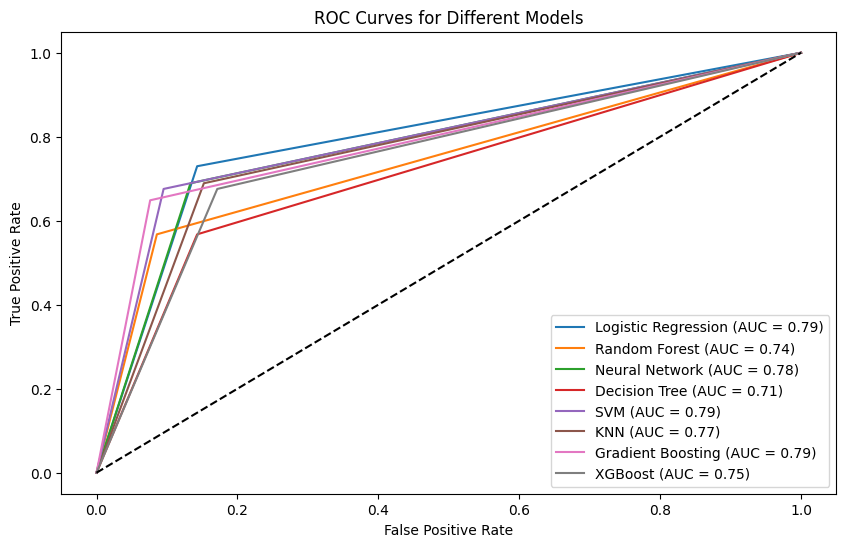

In [17]:
# importing the metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
# Create a dictionary to store all models and their predictions
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Neural Network': y_pred_nn,
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics for each model
for name, predictions in models.items():
    if predictions is not None:  # Only process if predictions exist
        model_names.append(name)
        accuracy_scores.append(accuracy_score(y_test, predictions))
        precision_scores.append(precision_score(y_test, predictions))
        recall_scores.append(recall_score(y_test, predictions))
        f1_scores.append(f1_score(y_test, predictions))

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores, 
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print("Model Performance Comparison:")
print(comparison_df)
print("\nDetailed Classification Reports:")
print("-" * 50)

# Print detailed classification report for each model
for name, predictions in models.items():
    if predictions is not None:  # Only process if predictions exist
        print(f"\n{name}:")
        print(classification_report(y_test, predictions))
    
# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Confusion Matrices for Different Models')

for i, (name, predictions) in enumerate(models.items()):
    if predictions is not None:  # Only plot if predictions exist
        row = i // 4
        col = i % 4
        cm = confusion_matrix(y_test, predictions)
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[row, col])
        axes[row, col].set_title(f'{name}')
        axes[row, col].set_xlabel('Predicted')
        axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(10, 6))
for name, predictions in models.items():
    if predictions is not None:  # Only plot if predictions exist
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\Ghaith\AppData\Local\Temp\ipykernel_62564\262524021.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Sex': {'male': 0, 'female': 1}})
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_62564\262524021.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Embarked': {'S': 1, 'C': 2, 'Q': 3}})


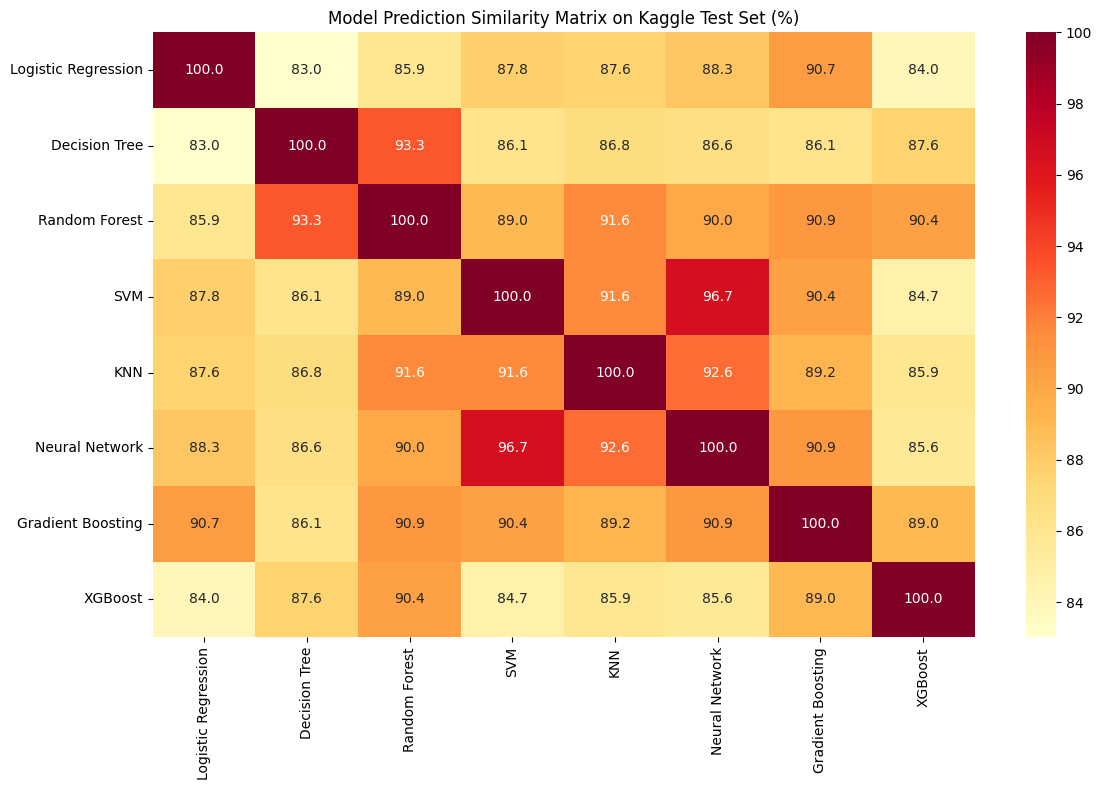


Model Prediction Similarity Matrix on Kaggle Test Set (%):
                     Logistic Regression  Decision Tree  Random Forest  \
Logistic Regression           100.000000      83.014354      85.885167   
Decision Tree                  83.014354     100.000000      93.301435   
Random Forest                  85.885167      93.301435     100.000000   
SVM                            87.799043      86.124402      88.995215   
KNN                            87.559809      86.842105      91.626794   
Neural Network                 88.277512      86.602871      89.952153   
Gradient Boosting              90.669856      86.124402      90.909091   
XGBoost                        83.971292      87.559809      90.430622   

                            SVM         KNN  Neural Network  \
Logistic Regression   87.799043   87.559809       88.277512   
Decision Tree         86.124402   86.842105       86.602871   
Random Forest         88.995215   91.626794       89.952153   
SVM                  

In [18]:
import numpy as np
# Load and preprocess Kaggle test data
kaggle_df_raw = pd.read_csv('titanic/test.csv')
kaggle_df = preprocess_df(kaggle_df_raw)
kaggle_df = normalize_data(kaggle_df)

# Get predictions from all models
kaggle_predictions = {}
model_objects = {
    'Logistic Regression': LR_model,
    'Decision Tree': DT_model,
    'Random Forest': RF_model,
    'SVM': SVM_model,
    'KNN': KNN_model,
    'Neural Network': NN_model,
    'Gradient Boosting': GB_model,
    'XGBoost': XGB_model
}
for name, model in model_objects.items():
    kaggle_predictions[name] = model.predict(kaggle_df)

# Convert predictions to binary (0 or 1)
for name in kaggle_predictions:
    if len(kaggle_predictions[name].shape) > 1:  # For neural network output
        kaggle_predictions[name] = (kaggle_predictions[name] > 0.5).astype(int).ravel()
    else:
        kaggle_predictions[name] = kaggle_predictions[name].astype(int)

# Create a similarity matrix
model_names = list(kaggle_predictions.keys())  # Changed from models.keys() to kaggle_predictions.keys()
n_models = len(model_names)
similarity_matrix = np.zeros((n_models, n_models))

# Calculate prediction similarity percentages
for i in range(n_models):
    for j in range(n_models):
        similarity = np.mean(kaggle_predictions[model_names[i]] == kaggle_predictions[model_names[j]]) * 100
        similarity_matrix[i, j] = similarity

# Create similarity DataFrame
similarity_df = pd.DataFrame(similarity_matrix, 
                           columns=model_names,
                           index=model_names)

# Plot similarity matrix
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_df, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Model Prediction Similarity Matrix on Kaggle Test Set (%)')
plt.tight_layout()
plt.show()

print("\nModel Prediction Similarity Matrix on Kaggle Test Set (%):")
print(similarity_df)



## 4- Saving the best model predictions:
- the best three models are Gradient Boosting, Random Forest and Neural Network.
- Gradient Boosting:
Similar performance to Random Forest
Strong across all metrics
Good balance between precision and recall
- Neural Network:
Competitive performance
Good generalization as shown in the training/validation curves
- Random Forest:
Consistently high performance across all metrics
One of the highest accuracy scores
Well-balanced precision and recall
### Note:
- Logistic Regression:
appears to have high accuracy, but we need to be cautious about using accuracy alone as the sole metric. Here's why:
Accuracy can be misleading in imbalanced datasets (which Titanic dataset is, with more deaths than survivors)
We need to look at other metrics like Precision, Recall, and F1-score to get a complete picture
The ROC curve and AUC score provide additional insight into model performance across different classification thresholds




In [19]:
# Get PassengerIds from kaggle_df_raw
passenger_ids = kaggle_df_raw['PassengerId'].values

# Create and save predictions for Gradient Boosting
gb_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': kaggle_predictions['Gradient Boosting']
})
gb_predictions.to_csv('gradient_boosting_predictions.csv', index=False)

# Create and save predictions for Neural Network 
nn_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': kaggle_predictions['Neural Network']
})
nn_predictions.to_csv('neural_network_predictions.csv', index=False)

# Create and save predictions for Random Forest
rf_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': kaggle_predictions['Random Forest']
})
rf_predictions.to_csv('random_forest_predictions.csv', index=False)

print("Prediction files have been saved:")
print("- gradient_boosting_predictions.csv")
print("- neural_network_predictions.csv") 
print("- random_forest_predictions.csv")


Prediction files have been saved:
- gradient_boosting_predictions.csv
- neural_network_predictions.csv
- random_forest_predictions.csv


In [20]:
# Create and save predictions for KNN
knn_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': kaggle_predictions['KNN']
})
knn_predictions.to_csv('knn_predictions.csv', index=False)

# Create and save predictions for Logistic Regression
lr_predictions = pd.DataFrame({
    'PassengerId': passenger_ids, 
    'Survived': kaggle_predictions['Logistic Regression']
})
lr_predictions.to_csv('logistic_regression_predictions.csv', index=False)

print("Additional prediction files have been saved:")
print("- knn_predictions.csv")
print("- logistic_regression_predictions.csv")

# Create and save predictions for XGBoost
xgb_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': kaggle_predictions['XGBoost']
})
xgb_predictions.to_csv('xgboost_predictions.csv', index=False)

print("Additional prediction file has been saved:")
print("- xgboost_predictions.csv")



Additional prediction files have been saved:
- knn_predictions.csv
- logistic_regression_predictions.csv
Additional prediction file has been saved:
- xgboost_predictions.csv


## 5- Results:
- The best model when applied to Kaggle was the Neural Network with an accuracy of 77% which was slightly higher than logistic regression and random forest.
### These are the results:

knn_predictions.csv
0.75837

logistic_regression_predictions.csv
0.76794

neural_network_predictions.csv
0.77033

random_forest_predictions.csv
0.76076

xgboost_predictions.csv
0.74162
